<a href="https://colab.research.google.com/github/yajuna/linearRegression/blob/master/linear_regression_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we play with measured weather data and measured tree temperature, and try to fit a simple linear regression model. We will Aug 21 data for training the model, and Aug 22-28 to test the model.
As these two days are close, they will probably have similar weather conditions; next step is to find dates that are far apart from Aug 21, and predict the temperature from different weather condtions.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import sys
print("Python 3 version is", sys.version)
import matplotlib
print("Matplotlib version is", matplotlib.__version__)
print("Numpy version is", np.__version__)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

Python 3 version is 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Matplotlib version is 3.7.1
Numpy version is 1.25.2


In [ ]:
# define parameter
n_t = 4000
radius = 0.135 # unit m
time = np.linspace(0, 24, n_t, endpoint = False)

In [ ]:
# # for binder's jupyterlab, uncomment and run
# !pip3 install openpyxl

In [ ]:
colnames = ['temp_datetime', 's45_1', 'e9_1', 'n135_1','e45_2', 'n9_2', 'w135_2', 'n45_3', 'w9_3','s135_3', 'w_ext_35']
url1 = "https://raw.githubusercontent.com/yajuna/linearRegression/master/Tree_Temp_Values_AUG21_to_AUG28_2022.xlsx"
dataTemp = pd.read_excel(url1,names=colnames)
dataTemp['temp_datetime'] = pd.to_datetime(dataTemp['temp_datetime'])
dataTemp = dataTemp.set_index('temp_datetime')

In [ ]:
train_range = dataTemp.loc['2022-08-21':'2022-08-21 23:59:59']

test_range = dataTemp.loc['2022-08-22':'2022-08-22 23:59:59']

train_temp_size = len(train_range.index)
# linear interpolate the measured temperature
train_coreTemp = np. interp(time, np.linspace(0,24,train_temp_size),train_range.s135_3)
train_midTemp1 = np. interp(time, np.linspace(0,24,train_temp_size),train_range.w9_3)
train_midTemp2 = np. interp(time, np.linspace(0,24,train_temp_size),train_range.n45_3)
train_barkTemp = np. interp(time, np.linspace(0,24,train_temp_size),train_range.w_ext_35)

test_temp_size = len(test_range.index)
test_coreTemp = np. interp(time, np.linspace(0,24,test_temp_size),test_range.s135_3)
test_midTemp1 = np. interp(time, np.linspace(0,24,test_temp_size),test_range.w9_3)
test_midTemp2 = np. interp(time, np.linspace(0,24,test_temp_size),test_range.n45_3)
test_barkTemp = np. interp(time, np.linspace(0,24,test_temp_size),test_range.w_ext_35)

print("measured temperature data read")
print(train_range)

print(test_range)

measured temperature data read
                     s45_1   e9_1  n135_1  e45_2   n9_2  w135_2  n45_3   w9_3  \
temp_datetime                                                                   
2022-08-21 00:01:51  25.18  26.25   24.62  25.62  26.12   26.00  25.25  26.00   
2022-08-21 00:05:07  25.18  26.18   24.62  25.68  26.12   26.00  25.25  26.00   
2022-08-21 00:08:23  25.12  26.18   24.62  25.62  26.12   26.00  25.18  25.93   
2022-08-21 00:11:38  25.18  26.18   24.56  25.62  26.06   26.00  25.18  26.00   
2022-08-21 00:14:54  25.12  26.18   24.62  25.62  26.06   26.00  25.18  26.00   
...                    ...    ...     ...    ...    ...     ...    ...    ...   
2022-08-21 23:46:08  25.18  26.43   25.06  25.87  26.68   26.56  25.56  26.37   
2022-08-21 23:49:24  25.18  26.43   25.06  25.87  26.68   26.56  25.56  26.37   
2022-08-21 23:52:40  25.18  26.43   25.06  25.87  26.68   26.56  25.50  26.37   
2022-08-21 23:55:56  25.12  26.43   25.00  25.87  26.62   26.50  25.50  26.37 

In [ ]:
colnames = ['weather_datetime', 'wind_speed', 'wind_direction', 'humidity', 'air_temperature', 'air_pressure', 'solar_DNI']
url2 = "https://raw.githubusercontent.com/yajuna/linearRegression/master/Weather_Station_AUG21_to_AUG28_2022.xlsx"
dataWeather = pd.read_excel(url2,names=colnames)
dataWeather['weather_datetime'] = pd.to_datetime(dataWeather['weather_datetime'])
dataWeather = dataWeather.set_index('weather_datetime')

In [ ]:
train_weather = dataWeather.loc['2022-08-21':'2022-08-21 23:59:59']

test_weather = dataWeather.loc['2022-08-22':'2022-08-22 23:59:59']

train_weather_size = len(train_weather.index)

train_airTemp = np.interp(time, np.linspace(0,24,train_weather_size),train_weather.air_temperature)
train_windSpeed = np.interp(time, np.linspace(0,24,train_weather_size),train_weather.wind_speed)
train_solar = np.interp(time, np.linspace(0,24,train_weather_size),train_weather.solar_DNI)
train_humidity = np.interp(time, np.linspace(0,24,train_weather_size),train_weather.humidity)
train_airPressure = np.interp(time, np.linspace(0,24,train_weather_size),train_weather.air_pressure)

test_weather_size = len(test_weather.index)

test_airTemp = np.interp(time, np.linspace(0,24,test_weather_size),test_weather.air_temperature)
test_windSpeed = np.interp(time, np.linspace(0,24,test_weather_size),test_weather.wind_speed)
test_solar = np.interp(time, np.linspace(0,24,test_weather_size),test_weather.solar_DNI)
test_humidity = np.interp(time, np.linspace(0,24,test_weather_size),test_weather.humidity)
test_airPressure = np.interp(time, np.linspace(0,24,test_weather_size),test_weather.air_pressure)

print(train_weather)

print(test_weather)

                     wind_speed  wind_direction  humidity  air_temperature  \
weather_datetime                                                             
2022-08-21 00:00:00      2.1758        195.8894   73.0005          23.8425   
2022-08-21 00:10:00      2.0381        195.6512   73.2226          23.5854   
2022-08-21 00:20:00      1.7478        193.6007   73.5104          23.3592   
2022-08-21 00:30:00      1.6064        188.9758   73.7139          23.1699   
2022-08-21 00:40:00      1.3614        199.9231   73.9565          22.9508   
...                         ...             ...       ...              ...   
2022-08-21 23:10:00      1.0138        213.2707   87.4109          22.7085   
2022-08-21 23:20:00      1.4568        205.0766   87.7499          22.6212   
2022-08-21 23:30:00      1.5097        197.3073   88.0380          22.6066   
2022-08-21 23:40:00      1.5505        194.7728   88.2570          22.6291   
2022-08-21 23:50:00      2.1849        191.2897   88.4429       

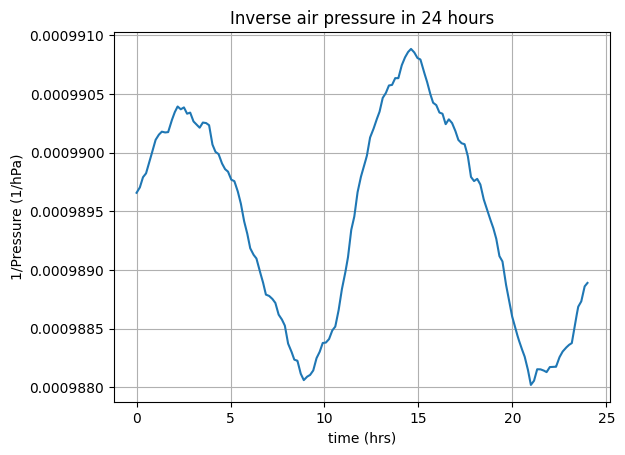

In [ ]:
# plot train weather
# import matplotlib.ticker as mtick
fig2, ax = plt.subplots()
ax.plot(time, 1./train_airPressure)
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
ax.set(xlabel='time (hrs)', ylabel='1/Pressure (1/hPa)',
       title='Inverse air pressure in 24 hours')
ax.grid()

fig2.savefig("train_airPressure_inv.eps")
plt.show()

In [ ]:
#include depth as training variable
# n = 0 for 9cm; n = 1 for 4.5cm
n = 1
depth_list = [0.09/radius, 0.045/radius]

# training Y temp
Ytrain_list = [train_midTemp1, train_midTemp2]

Ytest_list = [test_midTemp1, test_midTemp2]

# depth for training is depth1 or depth2
depth = np.ones(train_coreTemp.shape) * depth_list[n]

# Training data in x; training data in y
Xtrain = [1./train_humidity, train_airTemp, train_windSpeed, train_solar, depth, train_coreTemp, train_barkTemp]

X_train = np.array(Xtrain).T
Y_train = Ytrain_list[n]

# testing data in x, testing data in y.
ic_test = np.ones(test_coreTemp.shape) * Ytest_list[n][0]
Xtest = [1./test_humidity, test_airTemp, test_windSpeed, test_solar, depth, test_coreTemp, test_barkTemp]
X_test = np.array(Xtest).T
Y_test = Ytest_list[n]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(
  'mean_squared_error : ', mean_squared_error(Y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(Y_test, predictions))

print('max error:', max(abs(Y_test - predictions)))

mean_squared_error :  0.6190934518737831
mean_absolute_error :  0.6753567072728938
max error: 1.668903018194431


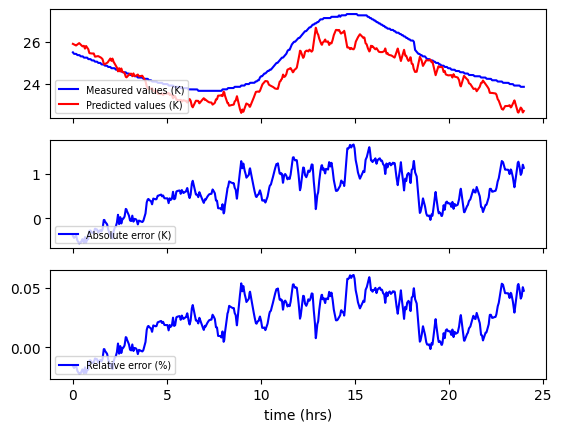

In [ ]:
# visualization

fig, axs = plt.subplots(3, sharex=True, sharey=False)
# fig.suptitle('Measured temperature, predicted temperature, absolute, and relative error')
axs[0].plot(time, Y_test, 'b-', label='Measured values (K)')
axs[0].plot(time, predictions, 'r-', label='Predicted values (K)')
axs[1].plot(time, Y_test - predictions, 'b-', label='Absolute error (K)')
axs[2].plot(time, (Y_test - predictions)/Y_test, 'b-', label='Relative error (%)')
axs[0].legend(loc='lower left', fontsize = 'x-small')
axs[1].legend(loc='lower left', fontsize = 'x-small')
axs[2].legend(loc='lower left', fontsize = 'x-small')
plt.xlabel('time (hrs)', fontsize=10)
fig.savefig("test5.1.eps")
plt.show()